In [12]:
import moleculetools as mt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

import numpy as np

In [2]:
els, coords = mt.read_xyz("asn10.xyz")
system = mt.Structure(els, coords)
system.translate_to_center()
system.rotate_to_z()

Molecule instantiated!



In [3]:
x_coord = system.coords[:,0]
y_coord = system.coords[:,1]
z_coord = system.coords[:,2]

In [4]:
def build_predictors(x, y):
    x2 = np.square(x)
    y2 = np.square(y)
    x4 = np.square(x2)
    y4 = np.square(y2)
    xy = np.multiply(x, y)
    x2y2 = np.square(xy)
    return np.column_stack([x, y, x2, y2, x4, y4, xy, x2y2])

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression(normalize=True)

In [8]:
X = build_predictors(x_coord, y_coord)
Y = z_coord
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [9]:
spacing = np.linspace(-5., 5., 50)
X2 = np.meshgrid(spacing, spacing)
grid_shape = X2[0].shape
X2 = np.reshape(X2, (2, -1)).T
grid = build_predictors(X2[:,0], X2[:,1])

In [10]:
preds = lr.predict(grid) + 0
lr.coef_

array([ 0.11218737,  0.08519567,  0.00108046,  0.01931458, -0.00028168,
       -0.00048801,  0.27491639, -0.00129089])

<IPython.core.display.Javascript object>


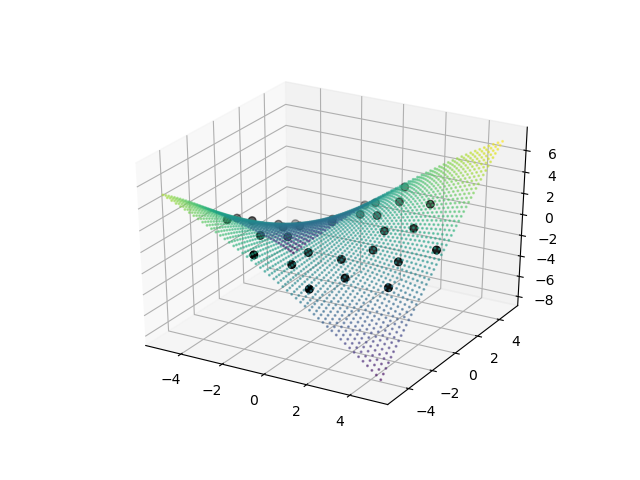

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coord, y_coord, z_coord, marker='o', s=30, color="black")
ax.scatter(grid[:,0], grid[:,1], preds, marker='.', s=5, alpha=0.5, c=preds, cmap="viridis")